DECISION TREES

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Load and prepare Titanic data
titanic_train=pd.read_csv("titanic_train.csv") #Read the data

#Impute meadian Age for NA values
new_age_var=np.where(titanic_train["Age"].isnull(), #Logical check
                    28, #Value if check is true
                    titanic_train["Age"]) #Value if check is false

titanic_train["Age"]=new_age_var

In [3]:
from sklearn import tree
from sklearn import preprocessing

In [4]:
#Initialize label encoder
label_encoder=preprocessing.LabelEncoder()

#Convert Sex variable to numeric
encoded_sex=label_encoder.fit_transform(titanic_train["Sex"])

#Initialize the model
tree_model=tree.DecisionTreeClassifier()

#Train the model
tree_model.fit(X=pd.DataFrame(encoded_sex),
              y=titanic_train["Survived"])

DecisionTreeClassifier()

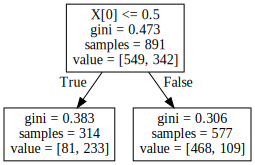

In [5]:
import graphviz
graphviz

#Save tree as a dot file
dot_data=tree.export_graphviz(tree_model,out_file=None)
graph=graphviz.Source(dot_data)
graph

In [6]:
#Get survived probability
preds=tree_model.predict_proba(X=pd.DataFrame(encoded_sex))

female=preds[titanic_train["Sex"]=="female"][0][1]
male=preds[titanic_train["Sex"]=="male"][0][1]

print(female) #Female survival probability
print(male) #Male survival probability

0.7420382165605095
0.18890814558058924


In [8]:
#Make data frame of predictors
predictors=pd.DataFrame([encoded_sex,titanic_train["Pclass"]]).T

#Train the model
tree_model.fit(X=predictors,
               y=titanic_train["Survived"])

DecisionTreeClassifier()

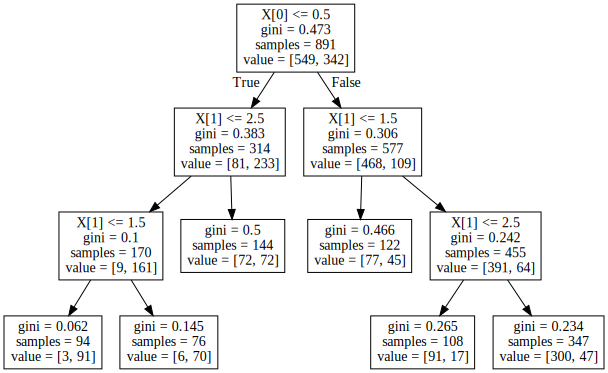

In [9]:
#Save file as dot file
dot_data=tree.export_graphviz(tree_model,out_file=None)
graph=graphviz.Source(dot_data)
graph

In [10]:
#Get survival probability
preds=tree_model.predict_proba(X=predictors)

#Create a table of predictions by sex and class
pd.crosstab(preds[:,0],columns=[titanic_train["Pclass"],
                               titanic_train["Sex"]])

Pclass        1           2           3     
Sex      female male female male female male
row_0                                       
0.031915     94    0      0    0      0    0
0.078947      0    0     76    0      0    0
0.500000      0    0      0    0    144    0
0.631148      0  122      0    0      0    0
0.842593      0    0      0  108      0    0
0.864553      0    0      0    0      0  347

In [11]:
predictors=pd.DataFrame([encoded_sex,
                        titanic_train["Pclass"],
                        titanic_train["Age"],
                        titanic_train["Fare"]]).T

#Initialize model with maximum tree depth set to 8
tree_model=tree.DecisionTreeClassifier(max_depth=8)

tree_model.fit(X=predictors,
              y=titanic_train["Survived"])

DecisionTreeClassifier(max_depth=8)

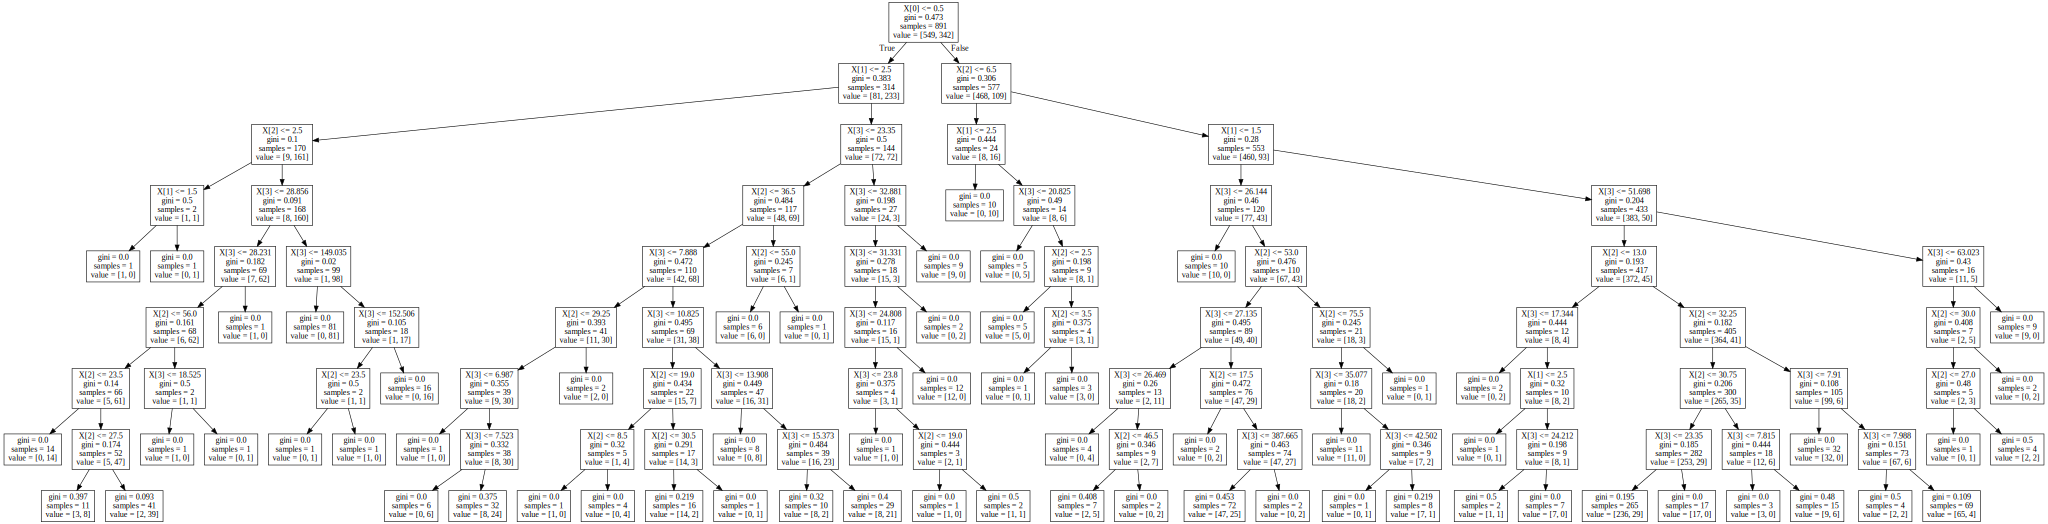

In [12]:
#Save tree as dot file
dot_data=tree.export_graphviz(tree_model,out_file=None)
graph=graphviz.Source(dot_data)
graph